In [11]:
import numpy as np
from MOEAD import MOEAD
from Problem import ZDT1, ZDT3

problem = ZDT3() # 問題
pop_size = 50 # 個体数
n_gen = 100 # 世代数
n_var = 30 # 設計変数

# 初期解
population = [np.random.rand(n_var) for _ in range(pop_size)]

res = MOEAD(pop_size=pop_size)
res.optimize(Problem=problem,
             population=population,
             n_gen=n_gen)

F = res.get_F() # 関数値を取得
#print(F)

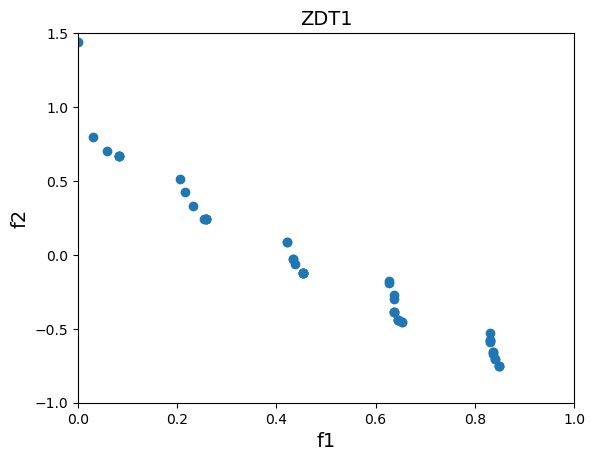

In [12]:
# --- 散布図 ---
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.xlabel("f1", fontsize=14)
plt.ylabel("f2", fontsize=14)
plt.title("ZDT1", fontsize=14)
plt.xlim(0,1)
plt.ylim(-1,1.5)

plt.scatter(F[:, 0], F[:, 1])    # 全解を表示